Training R² Score: 0.94
Testing R² Score: 0.48
Mean Squared Error (MSE): 118.81


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


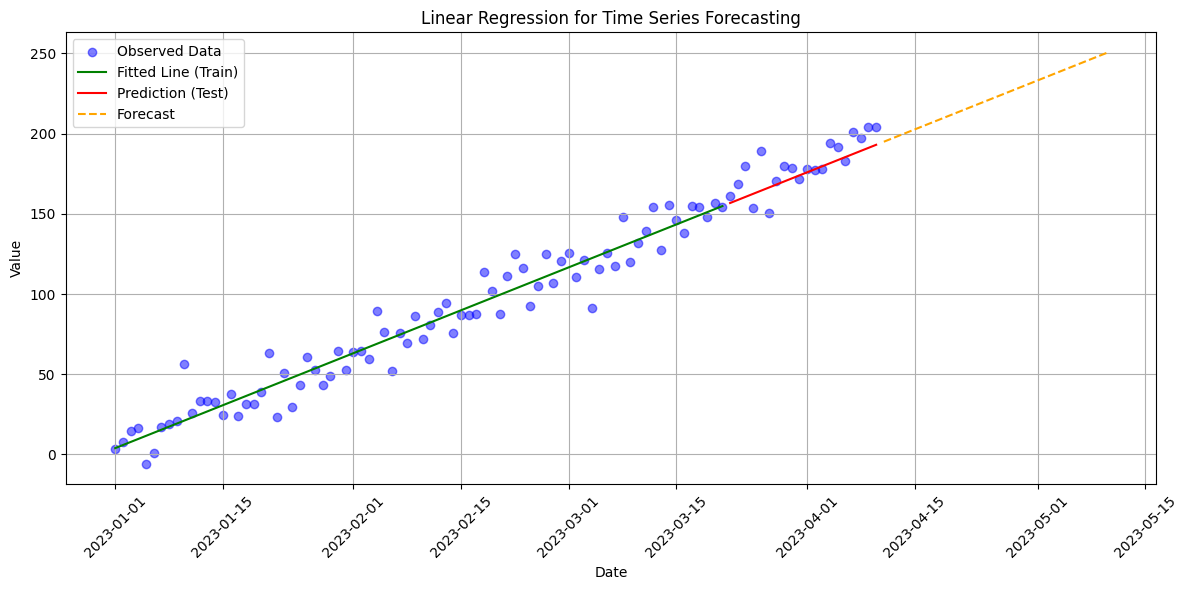

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate sample time series data (linear trend with noise)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = pd.DataFrame({
    'Date': dates,
    'Value': 2 * np.arange(100) + np.random.normal(0, 10, 100)  # Linear trend + noise
})
data.set_index('Date', inplace=True)

# Step 2: Feature engineering - use numerical time index
data['Time'] = np.arange(len(data))

# Step 3: Prepare data for regression
X = data[['Time']]
y = data['Value']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 7: Evaluate the model
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Step 8: Forecast future values (next 30 days)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_time = np.arange(len(data), len(data) + 30).reshape(-1, 1)
future_pred = model.predict(future_time)

# Step 9: Visualize everything
plt.figure(figsize=(12, 6))

# Plot the observed data (blue dots)
plt.scatter(data.index, data['Value'], color='blue', label='Observed Data', alpha=0.5)

# Plot the fitted line on training data (green)
plt.plot(data.index[:len(X_train)], y_pred_train, color='green', label='Fitted Line (Train)')

# Plot the prediction on test data (red)
plt.plot(data.index[len(X_train):], y_pred_test, color='red', label='Prediction (Test)')

# Plot future predictions (orange dashed line)
plt.plot(future_dates, future_pred, color='orange', linestyle='--', label='Forecast')

# Add labels, title, and legend
plt.title('Linear Regression for Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
